<a href="https://colab.research.google.com/github/chebbin/datasci_6_anova/blob/main/code/507_anova2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!pip install ucimlrepo

In [41]:
# Bring in the data
from ucimlrepo import fetch_ucirepo

# Bring in packages for dataframe and stats
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

# For visualization
import matplotlib.pyplot as plt

In [22]:
# fetch dataset
Diabetes = fetch_ucirepo(id=296)

# data (as pandas dataframes)
X = Diabetes.data.features
y = Diabetes.data.targets

df = pd.concat([X, y], axis=1)
df

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [23]:
df.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [24]:
df.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


# Variables of interest

dv = time_in_hospital  
iv1 = race  
iv2 = A1Cresult


In [25]:
df1 = pd.DataFrame(X)
df1

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [26]:
df

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [47]:
df.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


# Variables

dv = time_in_hospital  
iv1 = race  
iv2 = A1Cresult  

In [31]:
# Create a subset of the data that includes only the variables of interest
subset_df = df[['race', 'time_in_hospital', 'A1Cresult']]
subset_df

,race,time_in_hospital,A1Cresult
0,Caucasian,1,None
1,Caucasian,3,None
2,AfricanAmerican,2,None
3,Caucasian,2,None
4,Caucasian,1,None
...,...,...,...
101761,AfricanAmerican,3,>8
101762,AfricanAmerican,5,None
101763,Caucasian,1,None
101764,Caucasian,10,None


In [38]:
# Ensure the data types are appropriate
## Time in hospital is numerical
## Race and A1C results are strings (objects)
subset_df.dtypes

race                object
time_in_hospital     int64
A1Cresult           object
dtype: object

In [42]:
# When considering time in hospital by itself, Shapiro test p value is below .05
# indicating an abnormal distribution
stats.shapiro(df['time_in_hospital'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8869192600250244, pvalue=0.0)

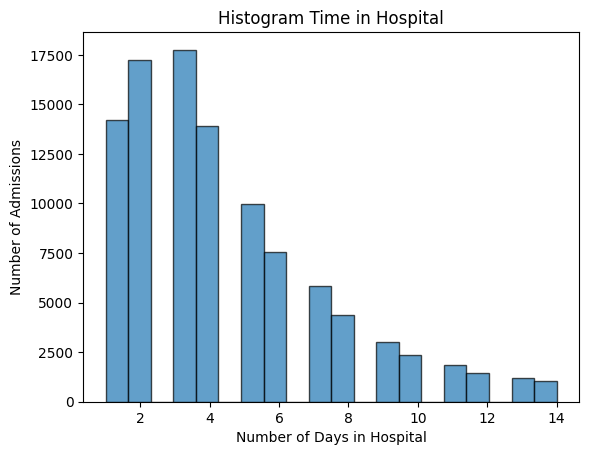

In [48]:
# Histogram also shows an abnormal distribution
plt.hist(df['time_in_hospital'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram Time in Hospital')
plt.xlabel('Number of Days in Hospital')
plt.ylabel('Number of Admissions')
plt.show()

In [49]:
# When grouping the dependent and independent variables, there is a normal distribution
# for 14 of the configurations and an abnormal distribution for 6 of the configurations
groups = df.groupby(['race', 'A1Cresult'])

for (cp_status, exang_status), group_df in groups:
    _, p_value = stats.shapiro(group_df['time_in_hospital'])

    print(f"Group ({cp_status}, {exang_status}):")
    print(f"P-value from Shapiro-Wilk Test: {p_value}\n")

Group (AfricanAmerican, >7):
P-value from Shapiro-Wilk Test: 1.8906119489850806e-16

Group (AfricanAmerican, >8):
P-value from Shapiro-Wilk Test: 6.7359146155303186e-34

Group (AfricanAmerican, None):
P-value from Shapiro-Wilk Test: 0.0

Group (AfricanAmerican, Norm):
P-value from Shapiro-Wilk Test: 2.9696700824519264e-25

Group (Asian, >7):
P-value from Shapiro-Wilk Test: 0.0023467366117984056

Group (Asian, >8):
P-value from Shapiro-Wilk Test: 2.233798113593366e-05

Group (Asian, None):
P-value from Shapiro-Wilk Test: 2.6558121925662052e-21

Group (Asian, Norm):
P-value from Shapiro-Wilk Test: 0.0007482930086553097

Group (Caucasian, >7):
P-value from Shapiro-Wilk Test: 1.7925673399754353e-38

Group (Caucasian, >8):
P-value from Shapiro-Wilk Test: 0.0

Group (Caucasian, None):
P-value from Shapiro-Wilk Test: 0.0

Group (Caucasian, Norm):
P-value from Shapiro-Wilk Test: 1.930148504761003e-41

Group (Hispanic, >7):
P-value from Shapiro-Wilk Test: 2.1721559733123286e-06

Group (Hispanic

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [50]:
# Levene's Test which has a very small p-value shows that there is a significant
# difference between the variances
stats.levene(
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['A1Cresult'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['A1Cresult'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['A1Cresult'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['A1Cresult'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Other'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'Other'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'Other'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Other'][df['A1Cresult'] == 'Norm'],
)


LeveneResult(statistic=7.450102003925801, pvalue=9.580811219790571e-21)

In [51]:
model = ols('time_in_hospital ~ C(race) * C(A1Cresult)', data=df).fit()

# Performing the two-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

## Result shows that the time in the hospital is affected by the race and A1C
## result as indicated by the high F value and p value that is smaller than .05

                             sum_sq       df           F        PR(>F)
C(race)                  641.735130      4.0   18.075566  7.501203e-15
C(A1Cresult)            3895.231358      3.0  146.287793  1.363867e-94
C(race):C(A1Cresult)     276.823623     12.0    2.599070  1.845652e-03
Residual              882895.150091  99473.0         NaN           NaN
